<a href="https://colab.research.google.com/github/edcaamal/GColab/blob/main/FaceReconogtion_Ver_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Reconocimiento de Rostros Ver 1-0

In [ ]:
# Comprobamos archvios cargados
# Xml
# imagenes para procesar
# jpg, jpeg, png

!ls -l

total 4
drwxr-xr-x 1 root root 4096 Apr 21 13:39 sample_data


In [ ]:
# Link apoyo
# https://robologs.net/2020/05/05/deteccion-y-reconocimiento-facial-con-opencv-python-y-facerecognition/

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=7e8d9f71640984da2a965f30a48049de6f5cdc9854dfaf0c0da9a145591c0d3a
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
# importar librerias

import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

In [ ]:
#Cargamos las imagenes con los rostros que queremos identificar:
imagen_einstein = face_recognition.load_image_file("einstein.jpeg")
imagen_paul     = face_recognition.load_image_file("paul.jpeg")
imagen_planck   = face_recognition.load_image_file("edgar.png")


#El siguiente paso es extraer los 'encodings' de cada imagen.
#Los encodings son las características únicas de cada rostro que permiten diferenciarlo de otros.
einstein_encodings  = face_recognition.face_encodings(imagen_einstein)[0]
paul_encodings      = face_recognition.face_encodings(imagen_paul)[0]
planck_encodings    = face_recognition.face_encodings(imagen_planck)[0]


In [ ]:
#Creamos un array con los encodings y otro con sus respectivos nombres:
encodings_conocidos = [
    einstein_encodings,
    paul_encodings,
    planck_encodings
]
nombres_conocidos = [
    "Albert Einstein",
    "Paul Langevin",
    "Edgar Caamal"
]


#Cargamos una fuente de texto:
font = cv2.FONT_HERSHEY_COMPLEX


In [ ]:
#Cargamos la imagen donde hay que identificar los rostros:
# img = face_recognition.load_image_file('imagen_input1.jpeg')
img = face_recognition.load_image_file('grupo.png')
# img = face_recognition.load_image_file('personas.png')

#(Para probar la segunda imagen hay que cambiar el argumento de la función por 'imagen_input2.jpg')



# Definir tres arrays, que servirán para guardar los parámetros de los rostros que se encuentren en la imagen:
loc_rostros       = [] #Localizacion de los rostros en la imagen (contendrá las coordenadas de los recuadros que las contienen)
encodings_rostros = [] #Encodings de los rostros
nombres_rostros   = [] #Nombre de la persona de cada rostro


#Localizamos cada rostro de la imagen y extraemos sus encodings:
loc_rostros       = face_recognition.face_locations(img)
encodings_rostros = face_recognition.face_encodings(img, loc_rostros)


In [ ]:
#Recorremos el array de encodings que hemos encontrado:
for encoding in encodings_rostros:

    #Buscamos si hay alguna coincidencia con algún encoding conocido:
    coincidencias = face_recognition.compare_faces(encodings_conocidos, encoding)

    #El array 'coincidencias' es ahora un array de booleanos.
    #Si contiene algun 'True', es que ha habido alguna coincidencia:
    if True in coincidencias:
        #Buscamos el nombre correspondiente en el array de nombres conocidos:
        nombre = nombres_conocidos[coincidencias.index(True)]

    #Si no hay ningún 'True' en el array 'coincidencias', no se ha podido identificar el rostro:
    else:
        nombre = "???"

    #Añadimos el nombre de la persona identificada en el array de nombres:
    nombres_rostros.append(nombre)


In [ ]:
#Dibujamos un recuadro rojo alrededor de los rostros desconocidos, y uno verde alrededor de los conocidos:
for (top, right, bottom, left), nombre in zip(loc_rostros, nombres_rostros):

    #Cambiar el color segun el nombre:
    if nombre != "???":
        color = (0,255,0) #Verde
    else:
        color = (0,0,255) #Rojo

    #Dibujar los recuadros alrededor del rostro:
    cv2.rectangle(img, (left, top), (right, bottom), color, 2)
    cv2.rectangle(img, (left, bottom - 20), (right, bottom), color, -1)

    #Escribir el nombre de la persona:
    cv2.putText(img, nombre, (left, bottom - 6), font, 0.6, (0,0,0), 1)

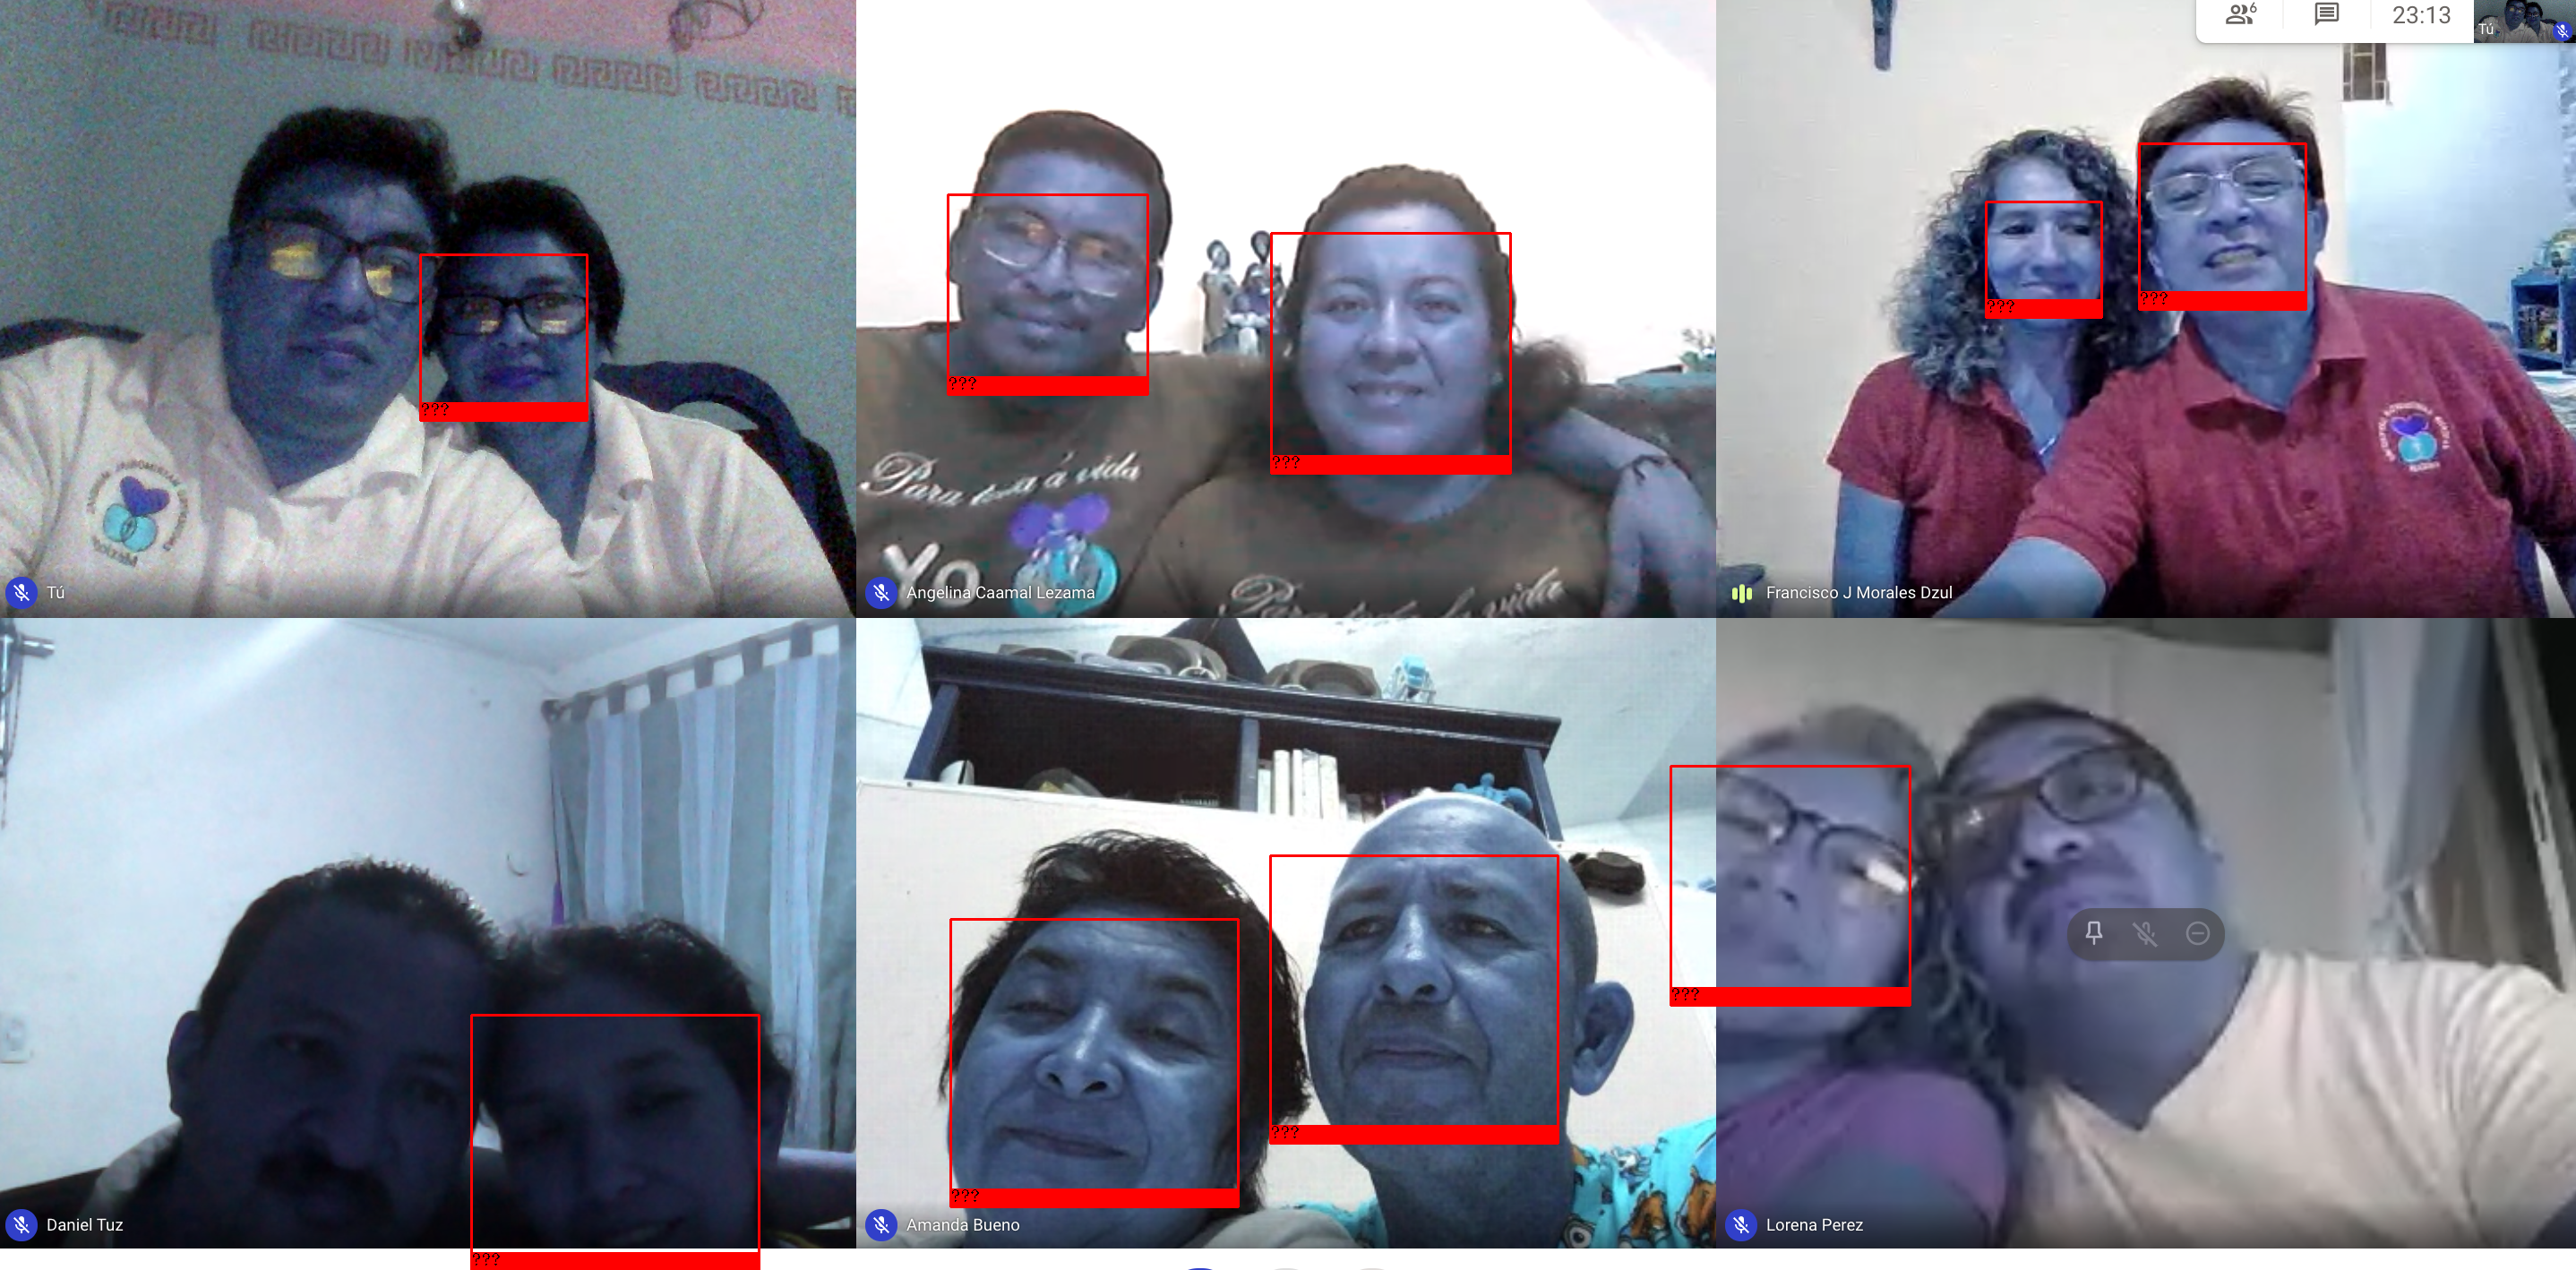

In [ ]:
#Abrimos una ventana con el resultado:

cv2_imshow(img)